In [1]:
# install nltk
!pip install nltk

In [2]:
# install gensim
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 56.9 MB/s eta 0:00:00


In [3]:
!pip install wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s eta 0:00:00


In [8]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [39]:
resume_df = pd.read_csv('/content/resume.csv', encoding='latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [40]:
resume_df = resume_df[['resume_text', 'class']]
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


In [41]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [42]:
resume_df.isnull().sum()

,0
resume_text,0
class,0


In [43]:
resume_df['class'].value_counts()

,count
class,
not_flagged,92
flagged,33


In [44]:
resume_df['class']=resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)

/tmp/ipython-input-2963082834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df['class']=resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)


In [45]:
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


In [46]:
class_0_df = resume_df [resume_df['class' ] == 0 ]
class_0_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
5,\rPoultney VT - Email me on Indeed: indeed.com...,0
...,...,...
119,Professional\rNewbury VT - Email me on Indeed:...,0
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0


In [47]:
class_1_df = resume_df [resume_df['class' ] == 1 ]
class_1_df

,resume_text,class
4,\rIndependent Consultant - Self-employed\rBurl...,1
7,Statistician\rBurlington VT - Email me on Inde...,1
10,Barbara Kurth\rResearch Assistant Professor Cl...,1
15,Caroline Clauson Work Study Student\rBrattlebo...,1
17,Chelsea Martin\rEnvironmental Scientist - Vana...,1
18,Christopher Fusting Data Science Consultant\rB...,1
23,David Grass\rCity Research Scientist - Environ...,1
24,David Lucero Public Health Analyst\rBurlington...,1
27,Drew Burkhard\rEnvironmental Scientist Meets M...,1
31,Eric Anderson Data Scientist\rBrattleboro VT -...,1


In [48]:

# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're", "edu', 'use', 'email', 'com'])

In [51]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)

    return ' '.join(result)

In [52]:
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)
display(resume_df)

,resume_text,class,cleaned
0,\rCustomer Service Supervisor/Tier - Isabella ...,0,customer service supervisor tier isabella cata...
1,\rEngineer / Scientist - IBM Microelectronics ...,0,engineer scientist ibm division westford alber...
2,\rLTS Software Engineer Computational Lithogra...,0,lts software engineer computational lithograph...
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0,tutor williston alec schwartz work experience ...
4,\rIndependent Consultant - Self-employed\rBurl...,1,independent consultant self employed burlingto...
...,...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0,brattleboro bcc skilled presenter trainer micr...
121,\rResearch and Teaching Assistant - University...,0,research teaching assistant university vermont...
122,\rMedical Coder - Highly Skilled - Entry Level...,0,medical coder highly skilled entry level sudbu...
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1,waterbury bec willing relocate authorized work...


In [53]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog company south burlington aecf work experience customer service supervisor tier isabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information proofreading administrative assistant events coordinator office services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects trav

In [54]:
print(resume_df['resume_text'][0])

Providing more than 15 years of combined office services with a focus on Administrative Assistance Customer Service Event Coordination Trade Show Coordination and Facilitating


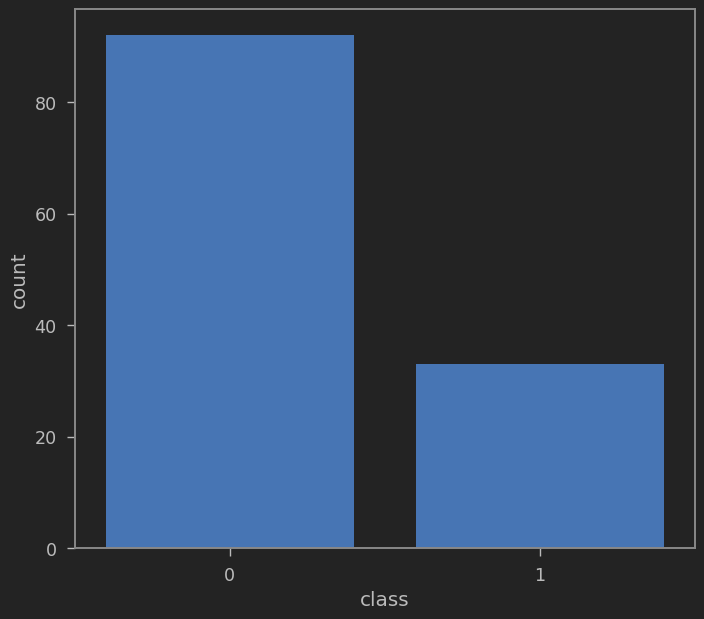

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=resume_df)
plt.show()

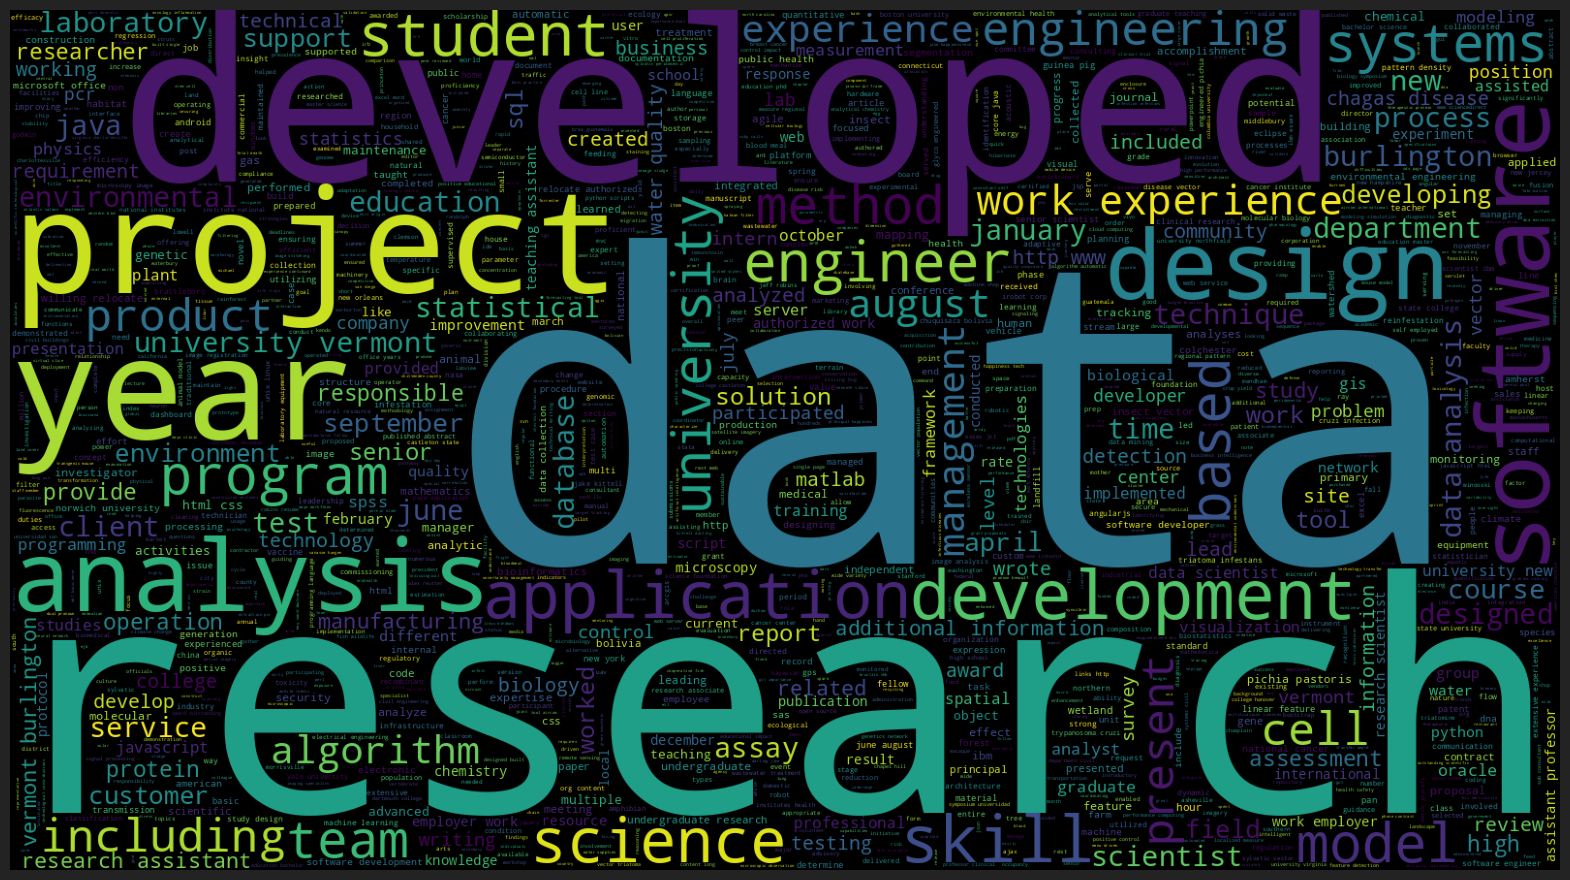

In [56]:
#plot the word cloud for text that is flagged
plt.figure(figsize = (20, 28))
wc = WordCloud(max_words = 2000, width= 1600, height = 888, stopwords = stop_words).generate(" ".join(resume_df[resume_df['class'] == 1]['cleaned']));
plt.imshow(wc)
plt.axis('off')
plt.show()

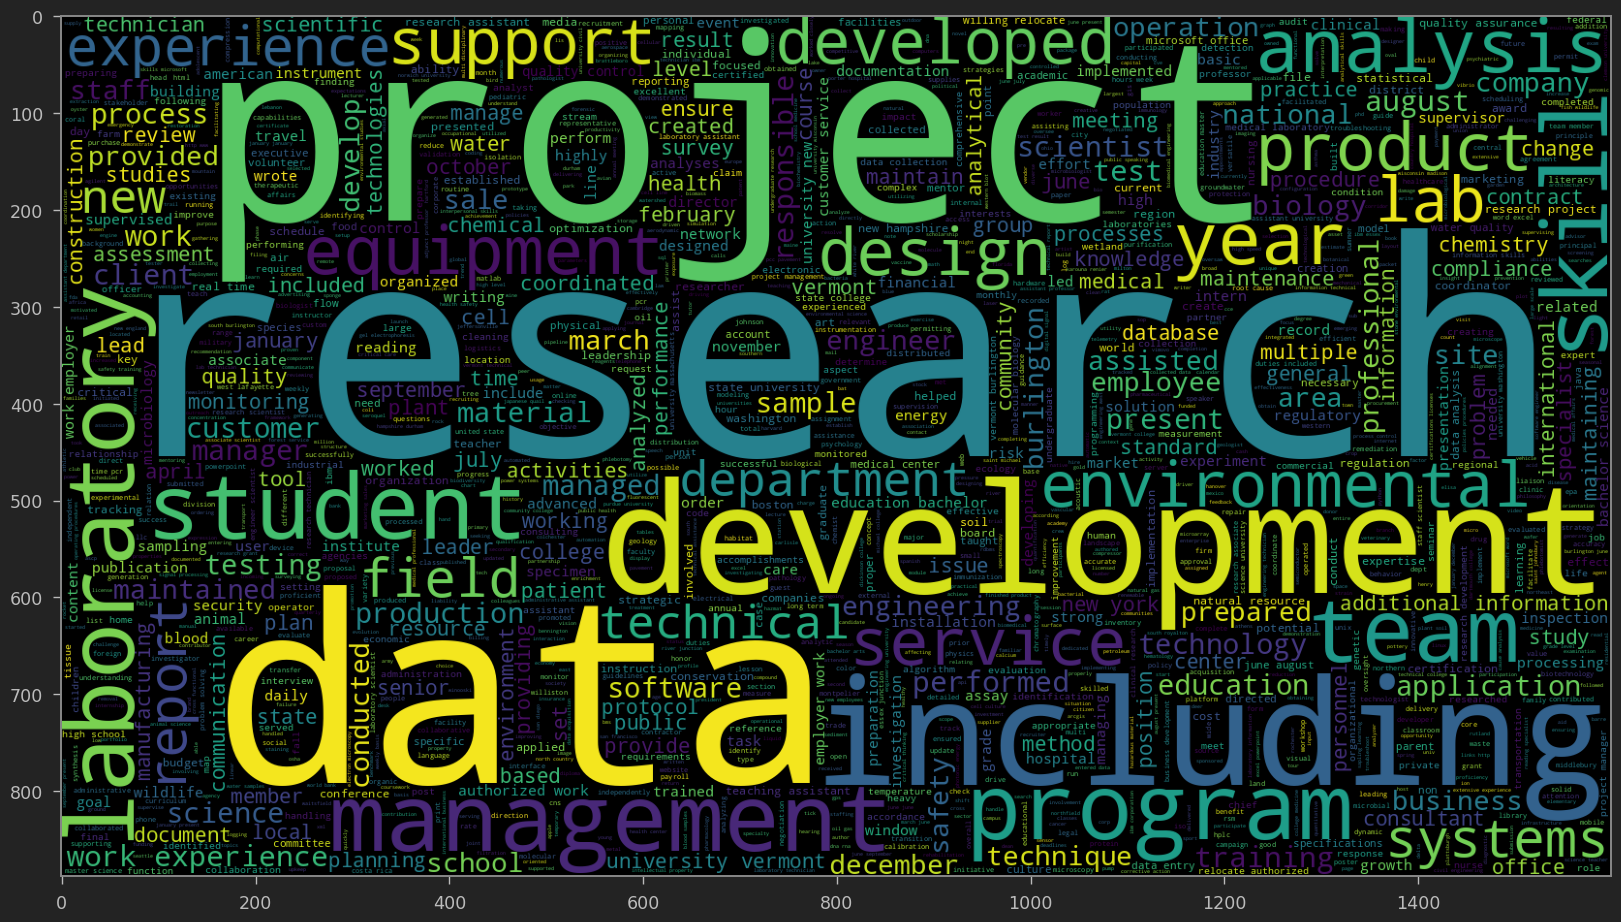

In [57]:
plt.figure(figsize = (20, 28))
wc = WordCloud(max_words = 2000, width= 1600, height = 888, stopwords = stop_words).generate(" ".join(resume_df[resume_df['class'] == 0]['cleaned']));
plt.imshow(wc)
plt.show()

In [ ]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names_out())

In [ ]:
print(X.toarray())

In [ ]:
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])


In [ ]:
print(vectorizer.get_feature_names_out())

In [ ]:
print(countvectorizer.toarray())

In [ ]:
from sklearn.model_selection import train_test_split

# Features (vectorized text data)
X = countvectorizer
# Target variable
y = resume_df['class']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Sanity check: print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [ ]:
# classification report
print(classification_report(y_test, y_predict_test))